In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

sns.set(font_scale=1.3)
%matplotlib widget

## Load data

In [146]:
df = pd.read_table("simulation_params_p4.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent
0,121.81250,121.562629,0.125000,0.124744,0.250000,0.500000,0.50
1,-0.18750,0.272431,-0.093750,0.136216,0.000000,1.000000,0.00
2,162.20875,114.787375,0.124904,0.088388,0.396205,0.333333,1.50
3,-0.31250,0.369755,-0.104167,0.123252,0.000000,1.000000,0.00
4,182.34375,105.276931,0.187019,0.107976,0.250000,0.500000,0.75
...,...,...,...,...,...,...,...
596,121.50000,0.192033,0.249487,0.000394,0.500000,0.250000,2.25
597,121.90625,121.906266,0.124968,0.124968,0.250000,0.500000,0.50
598,121.12500,121.750160,0.124550,0.125193,0.250000,0.500000,0.50
599,60.93750,105.113833,0.062693,0.108142,0.250000,0.500000,0.25


In [147]:
df['efficiency'].describe()

count    601.000000
mean     112.973042
std       84.536382
min       -1.375000
25%        0.250000
50%      121.625000
75%      170.343750
max      243.812500
Name: efficiency, dtype: float64

In [148]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [149]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

## Plot data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

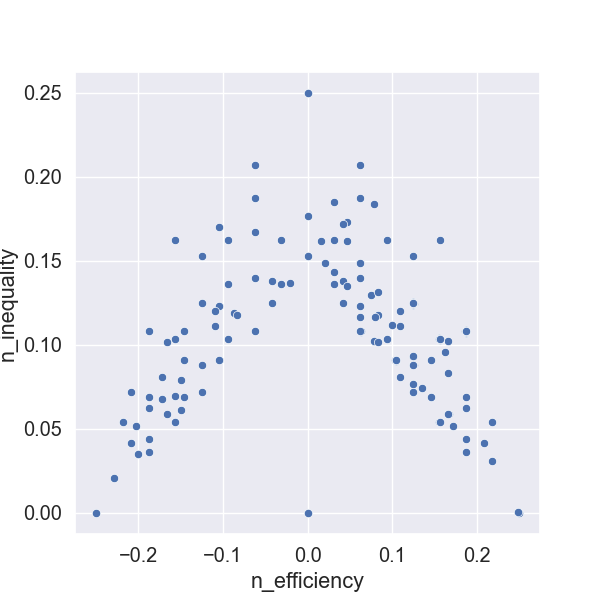

In [150]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='n_efficiency', y='n_inequality')

## Standardize data

In [151]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [152]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [153]:
df_red = df[['n_efficiency','n_inequality','entropy','info_per_agent']]
scaler = MinMaxScaler()
scaler.fit(df_red)
X_dat = scaler.transform(df_red)
X_dat.shape

(601, 4)

## t-sne

In [154]:
from sklearn.manifold import TSNE

In [155]:
# Get t-sne embeding with 3 dimensions
n_components = 3
tsne = TSNE(n_components,perplexity=100)
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 3)

## Plot results

In [156]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'tsne_3': tsne_result[:,2]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,tsne_3,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent
0,2.191343,4.455612,-0.143227,121.81250,121.562629,0.125000,0.124744,0.250000,0.500000,0.50
1,-7.931088,-1.380239,3.086910,-0.18750,0.272431,-0.093750,0.136216,0.000000,1.000000,0.00
2,6.144873,-2.302435,-0.814953,162.20875,114.787375,0.124904,0.088388,0.396205,0.333333,1.50
3,-7.773485,-1.425588,3.483621,-0.31250,0.369755,-0.104167,0.123252,0.000000,1.000000,0.00
4,3.989276,4.289429,-0.412645,182.34375,105.276931,0.187019,0.107976,0.250000,0.500000,0.75


In [157]:
##2D plots
#fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
#sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue='efficiency', palette='copper')
#sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue='entropy', palette='copper')
#sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue='inequality', palette='copper')
#sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue='info_per_agent', palette='copper')

In [158]:
##3D plots
#lab = 'info_per_agent'

#fig1 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig1)
#fig1.add_axes(ax)

#sc = ax.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=df_tsne_res[lab], cmap='copper')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

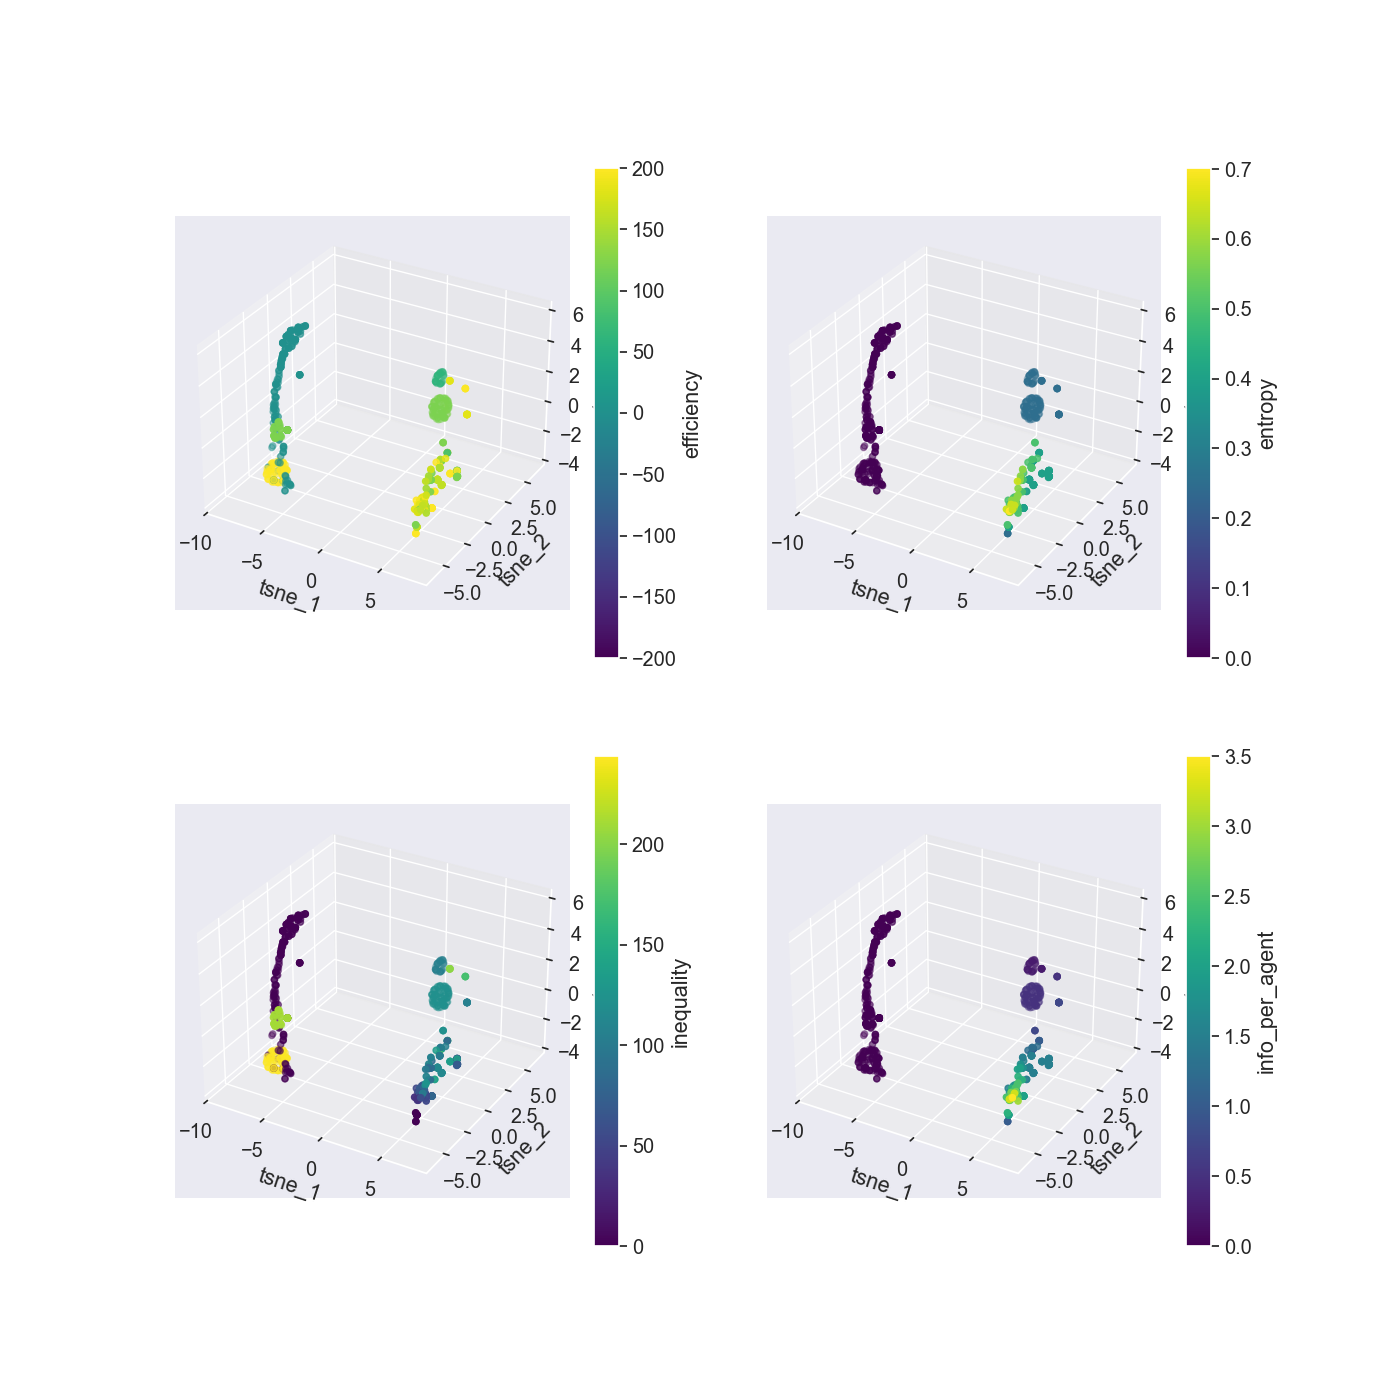

In [159]:
#3D plots
lab1 = 'efficiency'
lab2 = 'entropy'
lab3 = 'inequality'
lab4 = 'info_per_agent'

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1,projection='3d')
fig.add_axes(ax1)
sc1 = ax1.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=df_tsne_res[lab1], cmap='viridis', vmin=-200, vmax=200)
ax1.set_xlabel('tsne_1')
ax1.set_ylabel('tsne_2')
ax1.set_zlabel('tsne_3')
cbar1 = plt.colorbar(sc1)
cbar1.set_label(lab1)

ax2 = fig.add_subplot(2,2,2,projection='3d')
fig.add_axes(ax2)
sc2 = ax2.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=df_tsne_res[lab2], cmap='viridis')
ax2.set_xlabel('tsne_1')
ax2.set_ylabel('tsne_2')
ax2.set_zlabel('tsne_3')
cbar2 = plt.colorbar(sc2)
cbar2.set_label(lab2)

ax3 = fig.add_subplot(2,2,3,projection='3d')
fig.add_axes(ax3)
sc3 = ax3.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=df_tsne_res[lab3], cmap='viridis')
ax3.set_xlabel('tsne_1')
ax3.set_ylabel('tsne_2')
ax3.set_zlabel('tsne_3')
cbar3 = plt.colorbar(sc3)
cbar3.set_label(lab3)

ax4 = fig.add_subplot(2,2,4,projection='3d')
fig.add_axes(ax4)
sc4 = ax4.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=df_tsne_res[lab4], cmap='viridis')
ax4.set_xlabel('tsne_1')
ax4.set_ylabel('tsne_2')
ax4.set_zlabel('tsne_3')
cbar4 = plt.colorbar(sc4)
cbar4.set_label(lab4)



#plt.show()

In [160]:
af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-50, random_state=0).fit(X_dat)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters = len(cluster_centers_indices)
n_clusters, len(np.unique(labels))

(2, 2)

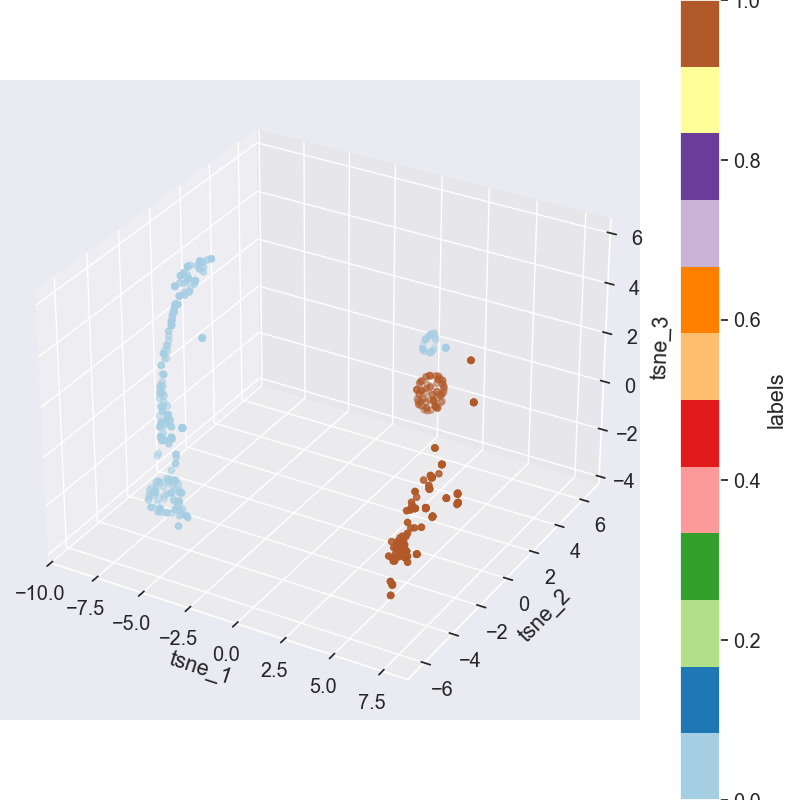

In [161]:
#3D plot clustering
lab = 'labels'

fig0 = plt.figure(figsize=(8,8))
ax = Axes3D(fig0)
fig0.add_axes(ax)

sc = ax.scatter(df_tsne_res.tsne_1,df_tsne_res.tsne_2,df_tsne_res.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')
cbar = plt.colorbar(sc)
cbar.set_label(lab)

##plt.show()

In [162]:
from scipy.special import binom


In [163]:
for i in range(1,9):
    print(binom(9,i))

9.0
36.0
84.0
126.0
126.0
84.0
36.0
9.0


In [164]:
126**10

1008568618886953829376